In [2]:
# module呼び出し
import openpyxl
import pandas as pd

In [8]:
# ファイル配置場所を変数に入れて読み取り専用で開く。
file_path = "./Billion.xlsx"
wb = openpyxl.load_workbook(file_path, data_only=True)

In [9]:
# 抽選回数の最終値を抽出する
ws = wb["当選番号"]
last_row = ws.max_row
#[debug] print(last_row)

In [10]:
# 抽選回数分の空データフレームを作成する
# ref: 6.1 whileによる反復処理
count = 1
win_numbers = {}  # 辞書を初期化

while count <= last_row:
    win_num_name = "win_num" + str(count)
    #[debug] print(win_num_name)

    # cell番号を指定して値を要素に追加する
    b_value = ws["B" + str(count)].value
    c_value = ws["C" + str(count)].value
    d_value = ws["D" + str(count)].value
    e_value = ws["E" + str(count)].value
    f_value = ws["F" + str(count)].value
    g_value = ws["G" + str(count)].value
    h_value = ws["H" + str(count)].value
    
     # Noneの場合に備えて条件を追加
    if None not in (b_value, c_value, d_value, e_value, f_value, g_value, h_value):
        win_numbers[win_num_name] = {
        'no1': int(b_value),
        'no2': int(c_value),
        'no3': int(d_value),
        'no4': int(e_value),
        'no5': int(f_value),
        'no6': int(g_value),
        'no7': int(h_value)
        }
    count += 1

# 特定のwin_numのデータを出力
#[debug] print(win_numbers['win_num2'])

In [11]:
# 全no1の合計値
count = 1
sum_no1 = 0

while count <= last_row:
    no1_val = (win_numbers['win_num' + str(count)]['no1'])
    sum_no1 = sum_no1 + no1_val
    count += 1

# output(result)
#[debug] print(sum_no1)

# no1の平均値の出力
sum_no1 / last_row


5.034136546184739

5.4


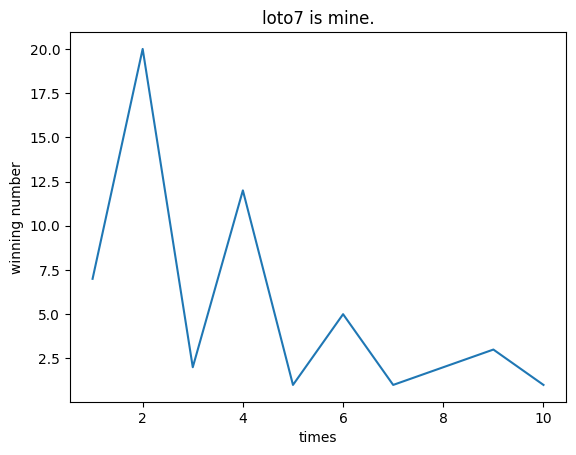

In [25]:
# ライブラリのインポート
import matplotlib.pyplot as plt # データを効率的に操作するためのライブラリ
import numpy as np              # グラフを簡単に書くライブラリ

# [important]:1-10の法則性を見つけ11の値が算出できるか。
count = 1
sum_no1 = 0

while count <= 10:
    no1_val = (win_numbers['win_num' + str(count)]['no1'])
    sum_no1 = sum_no1 + no1_val
    count += 1

# 1-10の平均値（result=5.4）
print(sum_no1 / 10)

# win_num11のwinningnumberは11であることを算出する。
plt.title("loto7 is mine.")           # タイトル

# y
plt.ylabel("winning number")          # 縦のタイトル
y = np.array([7,20,2,12,1,5,1,2,3,1]) # win_num1-10までのwinningnumvber

# x
plt.xlabel("times")                   # 横のタイトル
x = np.array([1,2,3,4,5,6,7,8,9,10])  # 回数

# graph出力
plt.plot(x, y)
plt.show()

In [ ]:
# no2の平均値
count = 1
sum_no2 = 0

while count <= last_row:
    no2_val = (win_numbers['win_num' + str(count)]['no2'])
    sum_no2 = sum_no2 + no2_val
    count += 1

# output(result)
#[debug] print(sum_no2)

# no2の平均値の出力
sum_no2 / last_row

In [ ]:
# no3の平均値
count = 1
sum_no3 = 0

while count <= last_row:
    no3_val = (win_numbers['win_num' + str(count)]['no3'])
    sum_no3 = sum_no3 + no3_val
    count += 1

# output(result)
#[debug] print(sum_no3)

# no3の平均値の出力
sum_no3 / last_row

In [ ]:
# no4の平均値
count = 1
sum_no4 = 0

while count <= last_row:
    no4_val = (win_numbers['win_num' + str(count)]['no4'])
    sum_no4 = sum_no4 + no4_val
    count += 1

# output(result)
#[debug] print(sum_no4)

# no4の平均値の出力
sum_no4 / last_row

In [ ]:
# no5の平均値
count = 1
sum_no5 = 0

while count <= last_row:
    no5_val = (win_numbers['win_num' + str(count)]['no5'])
    sum_no5 = sum_no5 + no5_val
    count += 1

# output(result)
#[debug] print(sum_no5)

# no5の平均値の出力
sum_no5 / last_row

In [ ]:
# no6の平均値
count = 1
sum_no6 = 0

while count <= last_row:
    no6_val = (win_numbers['win_num' + str(count)]['no6'])
    sum_no6 = sum_no6 + no6_val
    count += 1

# output(result)
#[debug] print(sum_no6)

# no6の平均値の出力
sum_no6 / last_row

In [ ]:
# no7の平均値
count = 1
sum_no7 = 0

while count <= last_row:
    no7_val = (win_numbers['win_num' + str(count)]['no7'])
    sum_no7 = sum_no7 + no7_val
    count += 1

# output(result)
#[debug] print(sum_no7)

# no7の平均値の出力
sum_no7 / last_row